## Sberbank Russian Housing Market

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv', index_col='id')

In [ ]:
df = df.drop(['ID_metro',
 'ID_railroad_station_walk',
 'ID_railroad_station_avto',
 'ID_big_road1',
 'ID_big_road2',
 'ID_railroad_terminal',
 'ID_bus_terminal'], axis=1)

print(df.shape)
df.head(3)

(30471, 284)


,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000


В соревновании использовали RMSLE. По факту, это коррень от MSLE, поэтому неважно, какую из них оптимизировать

In [ ]:
df['log_price_doc'] = np.log1p(df['price_doc'])
df = df.drop('price_doc', axis=1)
df.head(3)

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,log_price_doc
id,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,15.581952
2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,15.607270
3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,15.555977


## Работа с пропусками и и элементы EDA

In [ ]:
df.isna().sum()[df.isna().sum() != 0].sort_values(ascending=False)

,0
hospital_beds_raion,14441
build_year,13605
state,13559
cafe_sum_500_max_price_avg,13281
cafe_sum_500_min_price_avg,13281
cafe_avg_price_500,13281
max_floor,9572
kitch_sq,9572
num_room,9572
material,9572


In [ ]:
df.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,log_price_doc
count,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,3.047100e+04,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000
mean,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,1.765705e+07,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,15.609483
std,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,2.064961e+07,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,0.604574
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,2.081628e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.512935
25%,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,7.307411e+06,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,15.371548
50%,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,1.050803e+07,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,15.651990
75%,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,1.803644e+07,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,15.931766
max,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,2.060718e+08,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,18.526041


In [ ]:
numeric_columns = df.select_dtypes(include=['number']).columns
for col in numeric_columns:
  df[col] = df[col].fillna(df[col].mean())

In [ ]:
df.isna().sum()[df.isna().sum() != 0].sort_values(ascending=False)

,0


In [ ]:
df[numeric_columns].corr()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,log_price_doc
full_sq,1.000000,0.153837,0.089450,0.057390,0.015820,-0.002532,0.334760,0.009640,-0.038544,0.056303,...,0.039083,0.040059,0.043560,0.026895,0.028579,0.021568,0.030218,0.001580,-0.041254,0.271408
life_sq,0.153837,1.000000,0.038603,0.034483,0.010200,-0.002324,0.169211,0.000651,-0.058546,0.043262,...,0.024240,0.026800,0.029921,0.014980,0.015187,0.008870,0.019099,-0.012124,-0.043462,0.119971
floor,0.089450,0.038603,1.000000,0.373873,-0.007439,0.000855,-0.004654,-0.006957,-0.083337,-0.019321,...,-0.034680,-0.029541,-0.022228,-0.044265,-0.045475,-0.012222,-0.044093,-0.101769,-0.123534,0.117870
max_floor,0.057390,0.034483,0.373873,1.000000,0.045915,-0.000215,-0.014220,0.020345,-0.061203,-0.079591,...,-0.033935,-0.028423,-0.024940,-0.040653,-0.040605,-0.048229,-0.040977,-0.083772,-0.094960,0.078692
material,0.015820,0.010200,-0.007439,0.045915,1.000000,-0.004029,-0.026924,0.038747,-0.031320,0.001012,...,0.042947,0.036865,0.037508,0.032432,0.037626,0.041689,0.037472,0.082620,0.063992,0.011807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mosque_count_5000,0.021568,0.008870,-0.012222,-0.048229,0.041689,0.014699,0.051980,0.010915,0.068570,-0.086786,...,0.529434,0.492859,0.481481,0.502028,0.550342,1.000000,0.499376,0.518500,0.242078,0.130745
leisure_count_5000,0.030218,0.019099,-0.044093,-0.040977,0.037472,-0.000601,0.049396,-0.005270,-0.002915,-0.195067,...,0.986206,0.975462,0.948391,0.969029,0.975259,0.499376,1.000000,0.809169,0.463053,0.134175
sport_count_5000,0.001580,-0.012124,-0.101769,-0.083772,0.082620,0.004257,0.075427,0.014149,0.143328,-0.416222,...,0.824139,0.778770,0.753384,0.825883,0.847771,0.518500,0.809169,1.000000,0.733897,0.223386
market_count_5000,-0.041254,-0.043462,-0.123534,-0.094960,0.063992,0.005333,0.051672,0.022122,0.203451,-0.449849,...,0.432265,0.380154,0.353270,0.482547,0.514344,0.242078,0.463053,0.733897,1.000000,0.162569


In [ ]:
### Функции для фильтрации признаков

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 50))

Top Absolute Correlations
railroad_station_walk_km              railroad_station_walk_min                1.000000
public_transport_station_km           public_transport_station_min_walk        1.000000
children_preschool                    0_6_all                                  1.000000
children_school                       7_14_all                                 1.000000
metro_min_walk                        metro_km_walk                            1.000000
raion_build_count_with_material_info  raion_build_count_with_builddate_info    0.999990
young_all                             0_13_all                                 0.999885
young_female                          0_13_female                              0.999871
young_male                            0_13_male                                0.999861
full_all                              female_f                                 0.999850
                                      male_f                                   0.999788
young_

In [ ]:
### Удалим колонки, где корреляция оказывается > 0.9

check = []
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
                    check.append(colname)

correlation(df[numeric_columns], 0.9)

In [ ]:
df = df.drop(check, axis=1)
df.shape

(30471, 150)

In [ ]:
### Посмотрим на квазиконстантые признаки

from sklearn.feature_selection import VarianceThreshold

numeric_columns = df.select_dtypes(include=['number']).columns

cutter = VarianceThreshold(threshold=0.1)
cutter.fit(df[numeric_columns])
constant_cols = [x for x in numeric_columns if x not in cutter.get_feature_names_out()]

df[constant_cols]

,green_zone_part,indust_part,green_zone_km,cafe_count_500_price_high,mosque_count_500,mosque_count_1000,mosque_count_1500,mosque_count_2000
id,,,,,,,,
1,0.189727,0.000070,0.600973,0,0,0,0,0
2,0.372602,0.049637,0.065321,0,0,0,0,0
3,0.112560,0.118537,0.453172,0,0,0,0,0
4,0.194703,0.069753,0.106125,0,0,0,0,0
5,0.015234,0.037316,0.236214,0,0,0,0,0
...,...,...,...,...,...,...,...,...
30469,0.096270,0.300323,0.139814,0,0,0,0,1
30470,0.065444,0.000078,0.271861,0,0,0,0,0
30471,0.496315,0.007122,0.427248,0,0,0,0,0


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns].describe()

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
count,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471
unique,1161,2,146,2,2,2,2,2,2,2,2,2,2,2,2,5
top,2014-12-16,Investment,Poselenie Sosenskoe,no,no,no,no,no,no,no,no,no,no,no,no,poor
freq,160,19448,1776,28543,28817,28155,30175,19600,29335,27649,29608,27427,28134,29690,29578,8018


In [ ]:
for col in categorical_columns:
  if col != 'timestamp':
    # Если число уникальных значений меньше 5, то сделаем OHE
    if df[col].describe().loc['unique'] < 5:
      one_encoder = pd.get_dummies(df[col], drop_first=True, prefix=col).astype('int')
      df = pd.concat((df.drop(col, axis=1), one_encoder), axis=1)
    else:
      mean_encoder = df.groupby(col)['log_price_doc'].transform('mean')
      df[col] = mean_encoder

In [ ]:
df.head(3)

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,incineration_raion_yes,oil_chemistry_raion_yes,radiation_raion_yes,railroad_terminal_raion_yes,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes
id,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,0,0,0,0,0
2,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,0,0,0,0,0
3,2011-08-27,43,29.0,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

### Отсортируем по timestamp

df = df.sort_values('timestamp')
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year

df.head(3)

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,radiation_raion_yes,railroad_terminal_raion_yes,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes,month,year
id,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,0,0,0,8,2011
2,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,0,0,0,8,2011
3,2011-08-27,43,29.0,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,1,0,0,0,0,0,0,0,8,2011


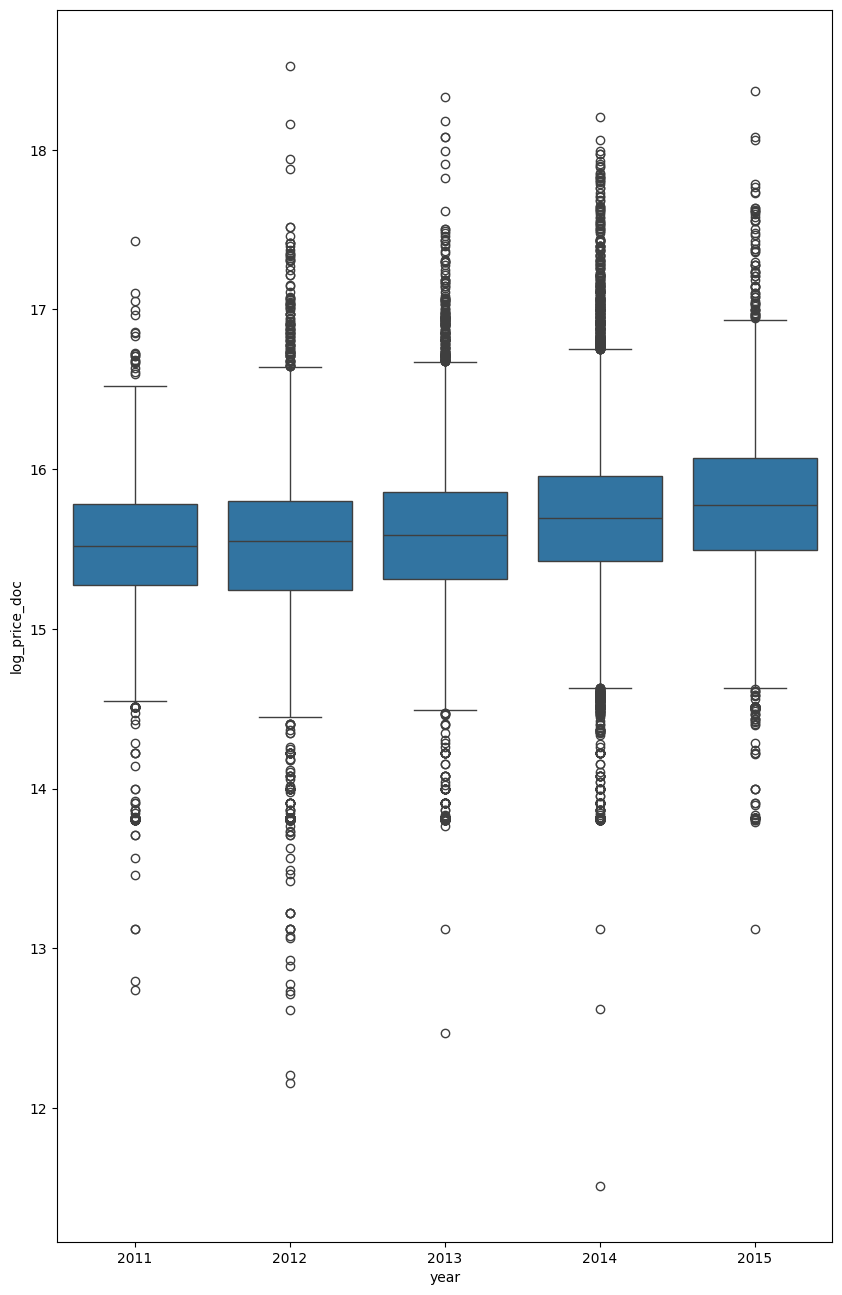

In [ ]:
### Построим графики распределений для некоторых фичей

### Например, распределения таргета по годам

import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(10, 16)

sns.boxplot(y=df['log_price_doc'], x=df['year'])
plt.show()

In [ ]:
one_hot = pd.get_dummies(df['year'], prefix='year', drop_first=True).astype('int')
df = pd.concat((df.drop('year', axis=1), one_hot), axis=1)

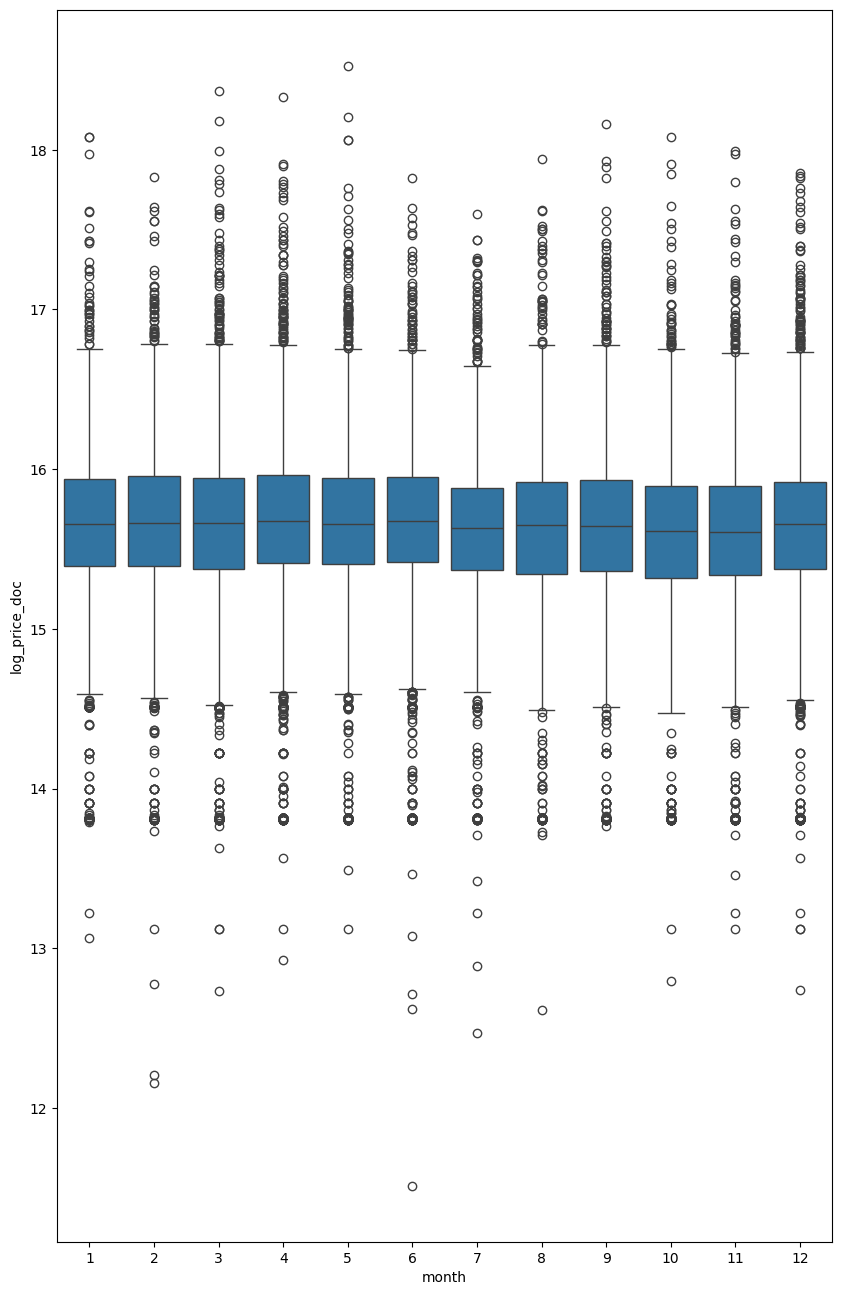

In [ ]:
fig = plt.figure()
fig.set_size_inches(10, 16)

sns.boxplot(y=df['log_price_doc'], x=df['month'])
plt.show()

In [ ]:
one_hot = pd.get_dummies(df['month'], prefix='month', drop_first=True).astype('int')
df = pd.concat((df.drop('month', axis=1), one_hot), axis=1)

In [ ]:
df = df.drop('timestamp', axis=1)

## Построим пару базовых моделей в качестве бэйзлайна

Установим "Тренировочную базу" - некоторое множество $\{x_t: x_t\in X, t <= T_0 \}$. Далее на каждом шаге будем отсутпать от него на некоторый фиксированный (для простоты) интервал $T_1$, называя все объекты, которые в него попали, валидацией на текущем шаге. После обучения модели и замера качества, будем добавлять $T_1$ к тренировочной базе. Новую модель будем обучать на более широком трейне, а тест - на более далеких во времени данных.


In [ ]:
### Разделим выборку на валидацию и тест

from sklearn.model_selection import TimeSeriesSplit

splitter = TimeSeriesSplit(n_splits=4)

In [ ]:
### Конструкция для замера качества на Кросс-Валидации

from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import KFold

#splitter = KFold(n_splits=4, shuffle=True, random_state=33)

test_losses = []
train_losses = []

X = df.drop('log_price_doc', axis=1)
Y = df['log_price_doc']

for train_index, test_index in splitter.split(X):
  x_train, x_test = X.values[train_index], X.values[test_index]
  y_train, y_test = Y.values[train_index], Y.values[test_index]

  model = LinearRegression()
  model.fit(x_train, y_train)

  test_losses.append(np.mean((model.predict(x_test) - y_test)**2))
  train_losses.append(np.mean((model.predict(x_train) - y_train)**2))

print(f"Среднее MSLE на тренировочных фолдах: {np.mean(train_losses).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {np.mean(test_losses).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.281
Среднее MSLE на тестовых фолдах: 0.38


In [ ]:
### Функция cross-validate

from sklearn.model_selection import cross_validate

model = LinearRegression()

cv_result = cross_validate(model, X, Y,
                           scoring='neg_mean_squared_error',
                           cv=splitter,
                           return_train_score=True)
print(cv_result)
print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result['test_score']).round(3)}")

{'fit_time': array([0.11800313, 0.2247858 , 0.24843073, 0.30401921]), 'score_time': array([0.01430941, 0.01418161, 0.0179913 , 0.00773406]), 'test_score': array([-0.24274171, -0.74526297, -0.235677  , -0.29710867]), 'train_score': array([-0.32632417, -0.2717254 , -0.26769871, -0.25795313])}
Среднее MSLE на тренировочных фолдах: 0.281
Среднее MSLE на тестовых фолдах: 0.38


In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(max_iter=100000)

cv_lasso_res = cross_validate(lasso_model, X, Y,
                              scoring='neg_mean_squared_error',
                              cv=splitter,
                              return_train_score=True)
print(cv_lasso_res)
print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_lasso_res['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_lasso_res['test_score']).round(3)}")

{'fit_time': array([0.13602805, 0.24013186, 0.2832973 , 0.36908698]), 'score_time': array([0.00744915, 0.00800133, 0.01571989, 0.00730252]), 'test_score': array([-0.26519083, -0.57354353, -0.31359976, -0.28921712]), 'train_score': array([-0.36885726, -0.31288581, -0.32147856, -0.3165469 ])}
Среднее MSLE на тренировочных фолдах: 0.33
Среднее MSLE на тестовых фолдах: 0.36


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaller', StandardScaler()), ('lasso_model', Lasso(max_iter=100000))])
pipe.fit(X, Y)

cv_pipe_res = cross_validate(pipe, X, Y,
                             scoring='neg_mean_squared_error',
                             cv=splitter,
                             return_train_score=True)
print(cv_pipe_res)
print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_pipe_res['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_pipe_res['test_score']).round(3)}")

{'fit_time': array([0.04815292, 0.12252736, 0.11592364, 0.15842819]), 'score_time': array([0.01538539, 0.01373458, 0.01584339, 0.01579094]), 'test_score': array([-0.31948811, -0.36138367, -0.37458196, -0.36277954]), 'train_score': array([-0.42580409, -0.37002051, -0.36561065, -0.36713545])}
Среднее MSLE на тренировочных фолдах: 0.382
Среднее MSLE на тестовых фолдах: 0.355


In [ ]:
pipe.get_params()

{'memory': None,
 'steps': [('scaller', StandardScaler()),
  ('lasso_model', Lasso(max_iter=100000))],
 'transform_input': None,
 'verbose': False,
 'scaller': StandardScaler(),
 'lasso_model': Lasso(max_iter=100000),
 'scaller__copy': True,
 'scaller__with_mean': True,
 'scaller__with_std': True,
 'lasso_model__alpha': 1.0,
 'lasso_model__copy_X': True,
 'lasso_model__fit_intercept': True,
 'lasso_model__max_iter': 100000,
 'lasso_model__positive': False,
 'lasso_model__precompute': False,
 'lasso_model__random_state': None,
 'lasso_model__selection': 'cyclic',
 'lasso_model__tol': 0.0001,
 'lasso_model__warm_start': False}

In [ ]:
alphas = np.linspace(start=0.01, stop=1, num=30)
alphas

array([0.01      , 0.04413793, 0.07827586, 0.11241379, 0.14655172,
       0.18068966, 0.21482759, 0.24896552, 0.28310345, 0.31724138,
       0.35137931, 0.38551724, 0.41965517, 0.4537931 , 0.48793103,
       0.52206897, 0.5562069 , 0.59034483, 0.62448276, 0.65862069,
       0.69275862, 0.72689655, 0.76103448, 0.79517241, 0.82931034,
       0.86344828, 0.89758621, 0.93172414, 0.96586207, 1.        ])

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"lasso_model__alpha": alphas}

search = GridSearchCV(pipe, param_grid,
                      cv=splitter, scoring='neg_mean_squared_error')
search.fit(X, Y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=-0.30296):
{'lasso_model__alpha': np.float64(0.11241379310344828)}


In [ ]:
### Убедимся, что все ок!

pipe.set_params(lasso_model__alpha=search.best_params_['lasso_model__alpha'])

Pipeline(steps=[('scaller', StandardScaler()),
                ('lasso_model',
                 Lasso(alpha=np.float64(0.11241379310344828),
                       max_iter=100000))])

In [ ]:
cv_result_pipe = cross_validate(Lasso(alpha=0.112), X, Y,
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_pipe['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_pipe['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.317
Среднее MSLE на тестовых фолдах: 0.407


## Анализ выбросов

In [ ]:
data = pd.concat((X, Y), axis=1)

In [ ]:
top_quantile = data['log_price_doc'].quantile(0.975)
low_quantile = data['log_price_doc'].quantile(0.025)

print(f"Топ 2,5% значение таргета: {top_quantile.round(2)}")
print(f"Топ 97,5% значение таргета: {low_quantile.round(2)}")

Топ 2,5% значение таргета: 16.7
Топ 97,5% значение таргета: 13.82


In [ ]:
### Выбросим объекты со значениями вне отрезка [top 2,5%; top97,5%]

data = data[(data['log_price_doc'] < top_quantile) & (data['log_price_doc'] > low_quantile)]
X_new = data.drop('log_price_doc', axis=1)
Y_new = data['log_price_doc']

In [ ]:
search.fit(X_new, Y_new)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=-0.16878):
{'lasso_model__alpha': np.float64(0.07827586206896552)}


In [ ]:
### Убедимся, что все ок!

pipe.set_params(lasso_model__alpha=search.best_params_['lasso_model__alpha'])

Pipeline(steps=[('scaller', StandardScaler()),
                ('lasso_model',
                 Lasso(alpha=np.float64(0.07827586206896552),
                       max_iter=100000))])

In [ ]:
the_best_lasso = Lasso(alpha=0.078)

cv_result_pipe = cross_validate(the_best_lasso, X_new, Y_new,
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_pipe['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_pipe['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.162
Среднее MSLE на тестовых фолдах: 0.242


## Новый прием: сегментация данных

In [ ]:
### Разделим квартиры по типу недвижимости
### Для первички и вторички будем строить разные модели

Owner_Occupier = data[data['product_type_OwnerOccupier'] == 1].copy()
Investment = data[data['product_type_OwnerOccupier'] == 0].copy()

In [ ]:
X_Occupier = Owner_Occupier.drop('log_price_doc', axis=1)
X_Investment = Investment.drop('log_price_doc', axis=1)

Y_Occupier = Owner_Occupier['log_price_doc']
Y_Investment = Investment['log_price_doc']

In [ ]:
### Соберем модель для Owner_Occupier

search_Owner_Occupier = GridSearchCV(pipe, param_grid,
                                     cv=splitter, scoring='neg_mean_squared_error')
search_Owner_Occupier.fit(X_Occupier, Y_Occupier)

print(f"Best parameter (CV score={search_Owner_Occupier.best_score_:.5f}):")
print(search_Owner_Occupier.best_params_)

pipe.set_params(lasso_model__alpha=search_Owner_Occupier.best_params_['lasso_model__alpha'])

cv_result_pipe = cross_validate(pipe, X_Occupier, Y_Occupier,
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

error_Occupier_train = -np.mean(cv_result_pipe['train_score'])
error_Occupier_test = -np.mean(cv_result_pipe['test_score'])

print(f"Среднее MSLE на тренировочных фолдах: {error_Occupier_train.round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {error_Occupier_test.round(3)}")

Best parameter (CV score=-0.08234):
{'lasso_model__alpha': np.float64(0.04413793103448276)}
Среднее MSLE на тренировочных фолдах: 0.072
Среднее MSLE на тестовых фолдах: 0.082


In [ ]:
### Соберем модель для Investment

search_Investment = GridSearchCV(pipe, param_grid,
                                cv=splitter, scoring='neg_mean_squared_error')

search_Investment.fit(X_Investment, Y_Investment)

print(f"Best parameter (CV score={search_Investment.best_score_:.5f}):")
print(search_Investment.best_params_)

pipe.set_params(lasso_model__alpha=search_Investment.best_params_['lasso_model__alpha'])

cv_result_pipe = cross_validate(pipe, X_Investment, Y_Investment,
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

error_Investment_train = -np.mean(cv_result_pipe['train_score'])
error_Investment_test = -np.mean(cv_result_pipe['test_score'])

print(f"Среднее MSLE на тренировочных фолдах: {error_Investment_train.round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {error_Investment_test.round(3)}")

Best parameter (CV score=-0.17547):
{'lasso_model__alpha': np.float64(0.01)}
Среднее MSLE на тренировочных фолдах: 0.181
Среднее MSLE на тестовых фолдах: 0.175


In [ ]:
### Перевзвесим скоры с учетом количества объектов
### в обоих типах жилья

n_Occupier = Owner_Occupier.shape[0]
n_Investment = Investment.shape[0]

## Посчитаем доли категорий в общий выборке

share_Occupier = n_Occupier / data.shape[0]
share_Investment = n_Investment / data.shape[0]

weighted_error_train = share_Occupier * error_Occupier_train + \
                       share_Investment * error_Investment_train

weighted_error_test = share_Occupier * error_Occupier_test + \
                       share_Investment * error_Investment_test

print(f"Среднее взвешенное MSLE на тренировочных фолдах: {weighted_error_train.round(3)}")
print(f"Среднее взвешенное MSLE на тестовых фолдах: {weighted_error_test.round(3)}")

Среднее взвешенное MSLE на тренировочных фолдах: 0.14
Среднее взвешенное MSLE на тестовых фолдах: 0.14
